In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
from scipy.stats import linregress


In [2]:
# Read raw csv file and view it.
listing_data = pd.read_csv("clean_data_rs/airbnbFINAL_JS.csv", low_memory=False, encoding="UTF-8")
listing_data

,id,host_id,host_name,host_is_superhost,host_total_listings_count,street,neighbourhood_cleansed,city,state,zipcode,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,distance_from_cbd
0,12936,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,15,94,9,10,94,9,9,9,0.15,5.205174
1,47100,212071,Loren,t,4,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,176,98,10,10,98,10,10,10,1.75,3.649571
2,50492,50121,Frank & Vince,t,17,"St Kilda, VIC, Australia",Port Phillip,St Kilda,Vic,3182,...,44,97,10,10,97,10,9,10,0.60,5.437003
3,51592,190879,Michelle,t,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,196,99,10,9,99,10,10,10,2.07,0.072335
4,66754,50121,Frank & Vince,t,17,"Richmond, VIC, Australia",Yarra,Richmond,Vic,3121,...,43,95,9,10,95,10,10,9,0.46,2.794548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,30410904,127327853,Nathan,f,1,"Melbourne, VIC, Australia",Melbourne,Melbourne,Vic,3000,...,2,100,10,10,100,10,10,10,2.00,0.700146
9885,30468406,30322920,Robyn,f,1,"Brunswick West, VIC, Australia",Moreland,Brunswick West,Vic,3055,...,1,0,0,0,0,0,0,0,1.00,5.893982
9886,30470482,36410227,Sabrina,f,276,"Port Melbourne, Australia",Port Phillip,Port Melbourne,Vic,3207,...,1,0,0,0,0,0,0,0,1.00,3.780995
9887,30483362,154023219,Aishah,f,1,"Preston, VIC, Australia",Darebin,Preston,Vic,3072,...,1,0,0,0,0,0,0,0,1.00,8.746854


### Basic clean up and filtering of relevant Data.

In [3]:
# Get the column names so that necessary column names can be extracted.
listing_data.columns

Index(['id', 'host_id', 'host_name', 'host_is_superhost',
       'host_total_listings_count', 'street', 'neighbourhood_cleansed', 'city',
       'state', 'zipcode', 'latitude', 'longitude', 'property_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'distance_from_cbd'],
      dtype='object')

In [4]:
# Get the data with relevant columns into a new dataframe and view it.
price_airbnb_data = listing_data[["id","city","property_type","accommodates","price","security_deposit",
                                  "cleaning_fee"]]
price_airbnb_data

,id,city,property_type,accommodates,price,security_deposit,cleaning_fee
0,12936,St Kilda,Apartment,3,159,450,100
1,47100,Richmond,Apartment,2,98,200,80
2,50492,St Kilda,Apartment,4,190,500,110
3,51592,Melbourne,Loft,4,228,250,40
4,66754,Richmond,Apartment,4,138,450,100
...,...,...,...,...,...,...,...
9884,30410904,Melbourne,Apartment,5,156,0,75
9885,30468406,Brunswick West,House,6,199,0,60
9886,30470482,Port Melbourne,Apartment,4,140,250,140
9887,30483362,Preston,Apartment,2,71,0,0


In [5]:
# Rename columns for better readability
price_data_renamed=price_airbnb_data.rename(columns={"id":"Listing ID", 
                                                     "city":"Suburbs", 
                                                     "price":"Price/Day($)", 
                                                    "security_deposit": "security_deposit ($)", 
                                                     "cleaning_fee": "cleaning_fee($)"})
price_data_renamed

,Listing ID,Suburbs,property_type,accommodates,Price/Day($),security_deposit ($),cleaning_fee($)
0,12936,St Kilda,Apartment,3,159,450,100
1,47100,Richmond,Apartment,2,98,200,80
2,50492,St Kilda,Apartment,4,190,500,110
3,51592,Melbourne,Loft,4,228,250,40
4,66754,Richmond,Apartment,4,138,450,100
...,...,...,...,...,...,...,...
9884,30410904,Melbourne,Apartment,5,156,0,75
9885,30468406,Brunswick West,House,6,199,0,60
9886,30470482,Port Melbourne,Apartment,4,140,250,140
9887,30483362,Preston,Apartment,2,71,0,0


In [6]:
# check datatype to make sure price columns are numerical
price_data_renamed.dtypes

Listing ID               int64
Suburbs                 object
property_type           object
accommodates             int64
Price/Day($)             int64
security_deposit ($)     int64
cleaning_fee($)          int64
dtype: object

In [7]:
# To check for split up of datatypes within the same column
price_data_renamed['Price/Day($)'].apply(type).value_counts()

<class 'int'>    9889
Name: Price/Day($), dtype: int64

In [8]:
# Convert all currency columns to numeric data type.
#price_data_renamed[['Price/Day($)','security_deposit ($)','cleaning_fee($)']] = price_data_renamed[['Price/Day($)','security_deposit ($)','cleaning_fee($)']].replace({'\$': '', ',': ''}, regex=True).astype(float)
#price_data_renamed.dtypes

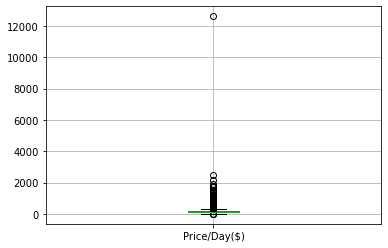

In [9]:
# Check via box and whisker plot if there are extreme values in the dataset.
price_data_renamed.boxplot(column='Price/Day($)', return_type='axes')

In [10]:
# Making sure unique values show extreme values
c=price_data_renamed['Price/Day($)'].unique()
c.sort()
print(c)

[    0    12    25    30    39    40    44    46    47    48    50    53
    54    55    57    58    60    61    62    64    65    66    68    69
    71    72    73    75    76    78    79    80    82    83    84    86
    87    89    90    91    93    94    96    97    98   100   101   102
   104   105   107   108   109   111   112   114   115   116   118   119
   120   121   122   123   125   126   127   129   130   132   133   134
   136   137   138   140   141   143   144   145   147   148   150   151
   152   154   155   156   158   159   161   162   163   165   166   168
   169   170   172   173   174   176   177   179   180   181   183   184
   186   187   188   190   191   192   194   195   197   198   199   202
   203   205   206   208   209   210   212   213   215   216   217   219
   220   221   224   226   227   228   230   233   234   235   237   238
   239   241   242   244   245   246   248   249   251   255   256   257
   259   260   262   264   266   267   269   270   

In [11]:
# Clean price data for extreme values i.e. rows with values=0 and <2500 price/day values.
price_data_cleaned = price_data_renamed.loc[(price_data_renamed["Price/Day($)"] > 0) &
                                            (price_data_renamed["Price/Day($)"] < 2500)]
len(price_data_cleaned)

9885

In [12]:
# Making sure extereme values are removed from dataset.
b= price_data_cleaned['Price/Day($)'].unique()
b.sort()
print(b)

[  12   25   30   39   40   44   46   47   48   50   53   54   55   57
   58   60   61   62   64   65   66   68   69   71   72   73   75   76
   78   79   80   82   83   84   86   87   89   90   91   93   94   96
   97   98  100  101  102  104  105  107  108  109  111  112  114  115
  116  118  119  120  121  122  123  125  126  127  129  130  132  133
  134  136  137  138  140  141  143  144  145  147  148  150  151  152
  154  155  156  158  159  161  162  163  165  166  168  169  170  172
  173  174  176  177  179  180  181  183  184  186  187  188  190  191
  192  194  195  197  198  199  202  203  205  206  208  209  210  212
  213  215  216  217  219  220  221  224  226  227  228  230  233  234
  235  237  238  239  241  242  244  245  246  248  249  251  255  256
  257  259  260  262  264  266  267  269  270  271  275  277  278  280
  285  287  288  289  291  293  295  296  298  299  300  302  305  307
  309  310  316  317  318  320  321  323  324  325  327  329  332  334
  335 

### Price/Day for property types Analysis

###  Price/Day Vs Suburb Analysis. 

In [13]:
# Check if entire row is the same datatype.
price_data_cleaned['Suburbs'].apply(type).value_counts()

<class 'str'>    9885
Name: Suburbs, dtype: int64

In [14]:
suburb_names = price_data_cleaned['Suburbs'].unique()
print(suburb_names)
print(len(suburb_names))

['St Kilda' 'Richmond' 'Melbourne' 'Fitzroy' 'Thornbury' 'Clifton Hill'
 'St Kilda East' 'Yarraville' 'Ivanhoe' 'Elwood' 'Middle Park' 'Carlton'
 'Hadfield' 'Parkville' 'North Melbourne' 'Caulfield North' 'Collingwood'
 'Southbank' 'South Yarra' 'Windsor' 'Abbotsford' 'East Melbourne'
 'Balaclava' 'Brunswick' 'Caulfield' 'Elsternwick' 'Kooyong' 'Flemington'
 'Hawthorn East' 'South Melbourne' 'Port Melbourne' 'Maidstone' 'Brighton'
 'Caulfield South' 'St Kilda West' 'Brunswick East' 'Seddon' 'Alphington'
 'Burnley' 'Fairfield' 'Northcote' 'Fitzroy North' 'Kew' 'Toorak'
 'Docklands' 'Glen Iris' 'Travancore' 'Gardenvale' 'Heidelberg Heights'
 'Prahran' 'Coburg' 'Pascoe Vale South' 'Newport' 'Cremorne' 'Heidelberg'
 'Maribyrnong' 'Glen Huntly' 'Moonee Ponds' 'Footscray' 'Brunswick West'
 'Malvern East' 'West Melbourne' 'Williamstown' 'Kensington' 'Albert Park'
 'West Footscray' 'Armadale' 'Brighton East' 'Ascot Vale' 'Kew East'
 'Camberwell' 'Hawthorn' 'Reservoir' 'Preston' 'Princes Hill'


In [15]:
# Get all unique property types.
unique_property = price_data_cleaned['property_type'].value_counts()
print(unique_property)

Apartment             7390
House                 1131
Townhouse              377
Condominium            323
Serviced apartment     280
Loft                   125
Guesthouse              93
Guest suite             70
Bungalow                33
Villa                   21
Cottage                 12
Tiny house               8
Boat                     6
Other                    5
Barn                     3
Bed and breakfast        2
Cabin                    1
Resort                   1
Nature lodge             1
Castle                   1
Camper/RV                1
Treehouse                1
Name: property_type, dtype: int64


In [17]:
# Limiting suburb analysis to only entire apartments.
only_apartment = price_data_cleaned.loc[(price_data_cleaned["property_type"]=="Apartment"),['Suburbs','property_type','accommodates','Price/Day($)']]
only_apartment

,Suburbs,property_type,accommodates,Price/Day($)
0,St Kilda,Apartment,3,159
1,Richmond,Apartment,2,98
2,St Kilda,Apartment,4,190
4,Richmond,Apartment,4,138
7,Clifton Hill,Apartment,4,180
...,...,...,...,...
9882,Melbourne,Apartment,2,134
9883,Melbourne,Apartment,3,112
9884,Melbourne,Apartment,5,156
9886,Port Melbourne,Apartment,4,140


In [ ]:
# Create a new column for price/day/person and fill calculated values



In [18]:
# Check the distribution of data for no. of people an apartment can accomodate
unique_accomodates = only_apartment['accommodates'].value_counts()
print(unique_accomodates)

4     2442
2     2248
6      971
3      757
5      590
8      123
7      108
10      33
9       32
1       30
12      21
11      12
16      10
13       6
14       4
15       3
Name: accommodates, dtype: int64


In [19]:
# Limit analysis to apartments that can accomodate smaller groups i.e. 2-6 people. Check no.of datapoints after.
apartment_accomodate = only_apartment.loc[(only_apartment["accommodates"] >= 2) & (only_apartment["accommodates"] <= 6)]
print(apartment_accomodate.head())
print(len(apartment_accomodate))

        Suburbs property_type  accommodates  Price/Day($)
0      St Kilda     Apartment             3           159
1      Richmond     Apartment             2            98
2      St Kilda     Apartment             4           190
4      Richmond     Apartment             4           138
7  Clifton Hill     Apartment             4           180
7008


In [20]:
# check if price/day data is normally distributed
#plt.hist(price_data_renamed['Price/Day($)'])
normal_test = sts.normaltest(apartment_accomodate['Price/Day($)'].sample(70))
normal_test

NormaltestResult(statistic=25.456017364761195, pvalue=2.9668532388237555e-06)

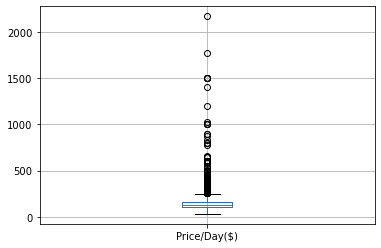

In [21]:
apartment_accomodate.boxplot(column='Price/Day($)', return_type='axes')

In [22]:
prices=apartment_accomodate['Price/Day($)']
quartiles = prices.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price/day for entire apartments is: {lowerq}")
print(f"The upper quartile of price/day for entire apartment is: {upperq}")
print(f"The interquartile range of price/day for entire apartment is: {iqr}")
print(f"The the median of price/days for entire apartment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of price/day for entire apartments is: 104.0
The upper quartile of price/day for entire apartment is: 163.0
The interquartile range of price/day for entire apartment is: 59.0
The the median of price/days for entire apartment is: 130.0 
Values below 15.5 could be outliers.
Values above 251.5 could be outliers.


In [30]:
# If we filter data to exclude all outlier bounds as per calculated data, we are only left with 345 data points. 
# This is because different property types will have different price ranges.  
outlier_filtered = apartment_accomodate.loc[(apartment_accomodate['Price/Day($)'] > lower_bound)
                                        &(apartment_accomodate['Price/Day($)'] < upper_bound)]
len(outlier_filtered)

6663

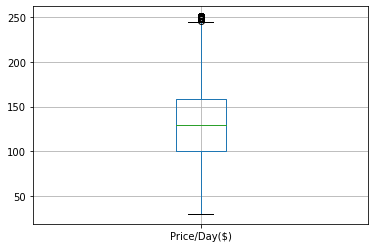

In [29]:
# Create box and whisker plot to check if data is rid of ouliers.
outlier_filtered.boxplot(column='Price/Day($)', return_type='axes')

In [130]:
## TOP 10 Suburbs
# Grouping apartments accomodating small groupsizes of 2-6 based on suburbs, find average price/day and get top 10 suburbs.
grouped_top = outlier_filtered.groupby("Suburbs")['Price/Day($)'].mean().sort_values().tail(10)
grouped_top

Suburbs
Maribyrnong           144.307692
Malvern East          144.923077
South Kingsville      145.000000
Port Melbourne        146.402778
Southbank             155.614754
Cremorne              157.500000
Brighton              157.650000
South Wharf           159.000000
Middle Park           177.357143
Heidelberg Heights    195.000000
Name: Price/Day($), dtype: float64

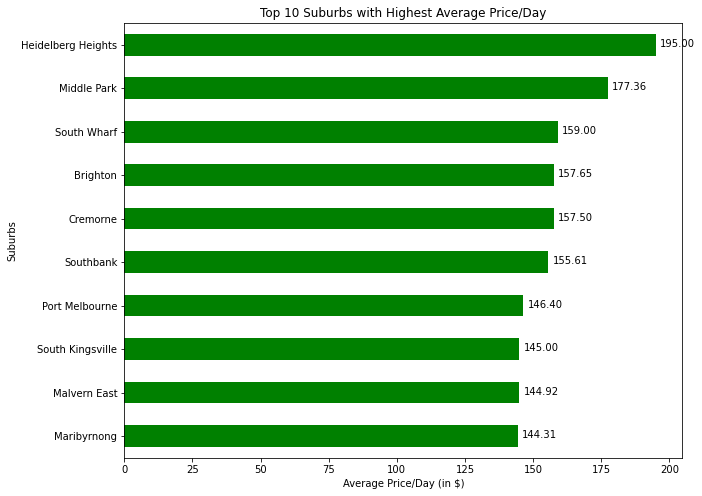

In [114]:
# Plot the top 10 suburbs with highest averageper/day prices.
bplot=grouped_top.plot(kind="barh",figsize=(10,8),color="green")
plt.xlabel("Average Price/Day (in $)")
plt.title("Top 10 Suburbs with Highest Average Price/Day")
for b in bplot.patches:
    width = b.get_width()
    plt.text(8+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [133]:
## Print Output Data.

# convert top10 dataseries to a Dataframe
grouped_top_DF=pd.DataFrame(grouped_top)
grouped_top_DF.reset_index(level=0, inplace=True)
grouped_top_DF

print("Top 10 Suburbs with Highest Average Price/Day (Entire Apartments accomodating 2-6 guests only) are : ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=grouped_top_DF.iloc[i,0]
    suburb_price=round(grouped_top_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average per/day price of ${suburb_price}")

Top 10 Suburbs with Highest Average Price/Day (Entire Apartments accomodating 2-6 guests only) are : 
-----------------------------------------
Maribyrnong has an average per/day price of $144.0
Malvern East has an average per/day price of $145.0
South Kingsville has an average per/day price of $145.0
Port Melbourne has an average per/day price of $146.0
Southbank has an average per/day price of $156.0
Cremorne has an average per/day price of $158.0
Brighton has an average per/day price of $158.0
South Wharf has an average per/day price of $159.0
Middle Park has an average per/day price of $177.0
Heidelberg Heights has an average per/day price of $195.0


In [134]:
## BOTTOM 10 Suburbs
# Grouping apartments accomodating small groupsizes of 2-6 based on suburbs, find average price/day and get top 10 suburbs.
grouped_bottom = outlier_filtered.groupby("Suburbs")['Price/Day($)'].mean().sort_values().head(10)
grouped_bottom

Suburbs
Hadfield          60.000000
Caulfield East    70.000000
Brighton East     77.500000
Eaglemont         79.000000
Fairfield         83.000000
Kew East          84.000000
Ormond            84.666667
Carnegie          86.400000
Thornbury         88.580645
West Footscray    89.666667
Name: Price/Day($), dtype: float64

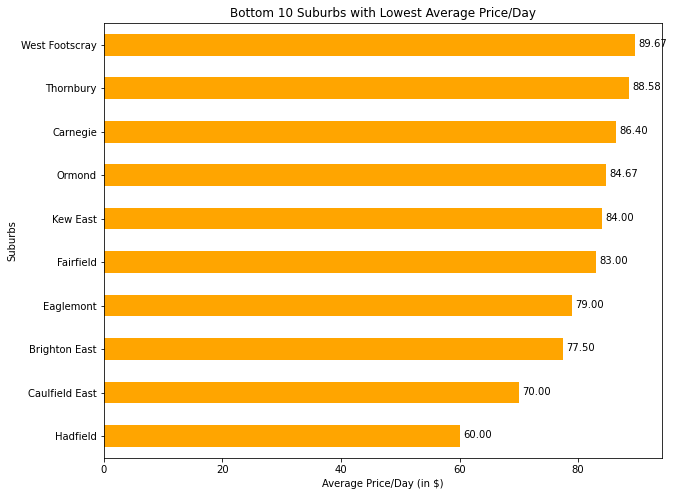

In [135]:
# Plot the bottom 10 suburbs with lowest averageper/day prices.
bplot2=grouped_bottom.plot(kind="barh",figsize=(10,8),color="orange")
plt.xlabel("Average Price/Day (in $)")
plt.title("Bottom 10 Suburbs with Lowest Average Price/Day")
for b in bplot2.patches:
    width = b.get_width()
    plt.text(3+b.get_width(), b.get_y()+0.55*b.get_height(),
             '{:1.2f}'.format(width),
             ha='center', va='center')

In [136]:
## Print Output Data.

# convert bottom 10 dataseries to a Dataframe
grouped_bottom_DF=pd.DataFrame(grouped_bottom)
grouped_bottom_DF.reset_index(level=0, inplace=True)
grouped_bottom_DF

print("Top 10 Suburbs with Highest Average Price/Day (Entire Apartments accomodating 2-6 guests only) are : ")
print("-----------------------------------------")
for i in range(0,10):
    suburb_name=grouped_bottom_DF.iloc[i,0]
    suburb_price=round(grouped_bottom_DF.iloc[i,1],0)
    print(f"{suburb_name} has an average per/day price of ${suburb_price}")

Top 10 Suburbs with Highest Average Price/Day (Entire Apartments accomodating 2-6 guests only) are : 
-----------------------------------------
Hadfield has an average per/day price of $60.0
Caulfield East has an average per/day price of $70.0
Brighton East has an average per/day price of $78.0
Eaglemont has an average per/day price of $79.0
Fairfield has an average per/day price of $83.0
Kew East has an average per/day price of $84.0
Ormond has an average per/day price of $85.0
Carnegie has an average per/day price of $86.0
Thornbury has an average per/day price of $89.0
West Footscray has an average per/day price of $90.0


### FOR EXPLANATION ONLY

#Checking if median yeilds similar results.
#apt_acc_grouped_med = apt_acc_grouped.groupby(["Suburbs"]).median()
#apt_acc_grouped2_med

#Checking if median yeilds similar results.Note: Indeed getting similar ratings
#topsuburbs_med = apt_acc_grouped2_med.sort_values("Price/Day($)",ascending=False)
#topsuburbs_med.head(10)

### Price/Day based on Property_Type and No. of guests

In [137]:
# Get all unique property types.
unique_property = price_data_cleaned['property_type'].value_counts()
print(unique_property)

Apartment             7390
House                 1131
Townhouse              377
Condominium            323
Serviced apartment     280
Loft                   125
Guesthouse              93
Guest suite             70
Bungalow                33
Villa                   21
Cottage                 12
Tiny house               8
Boat                     6
Other                    5
Barn                     3
Bed and breakfast        2
Cabin                    1
Resort                   1
Nature lodge             1
Castle                   1
Camper/RV                1
Treehouse                1
Name: property_type, dtype: int64


In [140]:
# Filter property_type to keep those with more than 100 datapoints.
type_price_data = price_data_cleaned.loc[(price_data_cleaned["property_type"]=="Apartment") | 
                                             (price_data_cleaned["property_type"]=="House") |
                                            (price_data_cleaned["property_type"]=="Townhouse") |
                                            (price_data_cleaned["property_type"]=="HouseCondominium") |
                                            (price_data_cleaned["property_type"]=="Serviced apartment") |
                                            (price_data_cleaned["property_type"]=="Loft") ,:]
                                            #(price_data_cleaned["property_type"]=="Guesthouse"),:]
type_price_data

,Listing ID,Suburbs,property_type,accommodates,Price/Day($),security_deposit ($),cleaning_fee($)
0,12936,St Kilda,Apartment,3,159,450,100
1,47100,Richmond,Apartment,2,98,200,80
2,50492,St Kilda,Apartment,4,190,500,110
3,51592,Melbourne,Loft,4,228,250,40
4,66754,Richmond,Apartment,4,138,450,100
...,...,...,...,...,...,...,...
9884,30410904,Melbourne,Apartment,5,156,0,75
9885,30468406,Brunswick West,House,6,199,0,60
9886,30470482,Port Melbourne,Apartment,4,140,250,140
9887,30483362,Preston,Apartment,2,71,0,0


In [141]:
# Get the unique values of no. of people accomodated
unique_acc = type_price_data['accommodates'].value_counts()
print(unique_acc)

4     3054
2     2484
6     1401
3      854
5      788
8      258
7      197
10      69
9       47
12      41
1       34
16      29
11      16
13      14
14      11
15       6
Name: accommodates, dtype: int64


In [143]:
# Again limiting the analysis to smalled groups of 2-6 people
type_accomodate = type_price_data.loc[(type_price_data["accommodates"] >= 2) & (type_price_data["accommodates"] <= 6)]
print(type_accomodate.head())
print(len(type_accomodate))

   Listing ID    Suburbs property_type  accommodates  Price/Day($)  \
0       12936   St Kilda     Apartment             3           159   
1       47100   Richmond     Apartment             2            98   
2       50492   St Kilda     Apartment             4           190   
3       51592  Melbourne          Loft             4           228   
4       66754   Richmond     Apartment             4           138   

   security_deposit ($)  cleaning_fee($)  
0                   450              100  
1                   200               80  
2                   500              110  
3                   250               40  
4                   450              100  
8581


In [ ]:
topsuburbs_df = grouped_suburb.sort_values("Price/Day($)",ascending=False)
topsuburbs_df.head(10)

In [ ]:
# check if price/day data is normally distributed
#plt.hist(price_data_renamed['Price/Day($)'])
normal_test = sts.normaltest(only_apartment['Price/Day($)'].sample(500))
normal_test

In [ ]:
only_apartment.boxplot(column='Price/Day($)', return_type='axes')

In [ ]:
prices=only_apartment['Price/Day($)']
quartiles = prices.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of price/day for enitre apartments is: {lowerq}")
print(f"The upper quartile of price/day for enitre apartment is: {upperq}")
print(f"The interquartile range of price/day for enitre apartment is: {iqr}")
print(f"The the median of price/days for enitre apartment is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
# If we filter data to exclude all outlier bounds as per calculated data, we are only left with 462 data points. 
# This is because different property types will have different price ranges.  
outlier_price_check = only_apartment.loc[(price_data_cleaned2['Price/Day($)'] < lower_bound) | 
                                            (price_data_cleaned2['Price/Day($)'] > upper_bound)]
len(outlier_price_check)

In [ ]:
# Hence based on box and whisker plot, we can remove only extreme outliers i.e any data with price/day more than $2000.
outlier_prices_df = price_data_cleaned2.loc[(price_data_cleaned2['Price/Day($)'] <= 2000)]
outlier_prices_df

In [ ]:
suburb_type_sorted=outlier_prices_df.groupby(['Suburbs','property_type']).mean()
suburb_type_sorted

In [ ]:
# For suburb based analysis, get the relevant columns.
suburb_analysis_df = outlier_prices_df[["Suburbs","property_type","Price/Day($)"]]
suburb_analysis_df

In [ ]:
grouped_suburb=suburb_analysis_df.groupby(['Suburbs']).mean()
grouped_suburb

In [ ]:
# Checking for results if median value is taken for calculation, will the results change.
#grouped_suburb2 = suburb_analysis_df.groupby(['Suburbs']).median()
#grouped_suburb2

In [ ]:
# Checking if choosing median changes the results. 
#sorted_topsuburbs2 = grouped_suburb2.sort_values("Price/Day($)",ascending=False)
#sorted_topsuburbs2.head(10)

In [ ]:
# Get average price/day for each locality and room type

grouped_city_roomtyp = price_data_renamed.groupby(['Suburbs'])
grouped_city_roomtyp.mean()
